### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

#### 1. Read in the `coupons.csv` file.




In [2]:
coupons_df = pd.read_csv('data/coupons.csv')

In [3]:
coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
coupons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

#### 2. Investigate the dataset for missing or problematic data.

In [5]:
print("\nCar column value counts")
print(coupons_df['car'].value_counts())

print("\nBar column value counts")
print(coupons_df['Bar'].value_counts())

print("\nCoffeeHouse column value counts")
print(coupons_df['CoffeeHouse'].value_counts())

print("\nCarryAway column value counts")
print(coupons_df['CarryAway'].value_counts())

print("\nRestaurantLessThan20 column value counts")
print(coupons_df['RestaurantLessThan20'].value_counts())

print("\nRestaurant20To50 column value counts")
print(coupons_df['Restaurant20To50'].value_counts())

print("\nCoupon column value counts")
print(coupons_df['coupon'].value_counts())

print("\nY column value counts")
print(coupons_df['Y'].value_counts())


Car column value counts
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

Bar column value counts
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

CoffeeHouse column value counts
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

CarryAway column value counts
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

RestaurantLessThan20 column value counts
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

Restaurant20To50 column value counts
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

Coupon column value counts
Coffe

In [6]:
duplicates = coupons_df[coupons_df.duplicated(keep = 'last')]
print("\n Total duplicates:",duplicates.shape[0])


missing_percentage = coupons_df.isnull().sum()*100/len(coupons_df)
missing_value_df = pd.DataFrame({'missing_count': coupons_df.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df = missing_value_df[missing_value_df.missing_count != 0]
missing_value_df


 Total duplicates: 74


,missing_count,missing_percentage
car,12576,99.148534
Bar,107,0.843582
CoffeeHouse,217,1.710817
CarryAway,151,1.190476
RestaurantLessThan20,130,1.024913
Restaurant20To50,189,1.490066


#### 3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
# Dropping Duplicates
coupons_clean_df = coupons_df.drop_duplicates()

In [8]:

# Filling nulls with most common data for columns with null percent ~1%
# For car we're not filling in data as 99% nulls can skew the data, or if we drop we'll loose almost all data. But for alanysis we'll that this in mind
coupons_clean_df['Bar']=coupons_clean_df['Bar'].fillna(coupons_clean_df['Bar'].value_counts().index[0])
coupons_clean_df['CoffeeHouse']=coupons_clean_df['CoffeeHouse'].fillna(coupons_clean_df['CoffeeHouse'].value_counts().index[0])
coupons_clean_df['CarryAway']=coupons_clean_df['CarryAway'].fillna(coupons_clean_df['CarryAway'].value_counts().index[0])
coupons_clean_df['RestaurantLessThan20']=coupons_clean_df['RestaurantLessThan20'].fillna(coupons_clean_df['RestaurantLessThan20'].value_counts().index[0])
coupons_clean_df['Restaurant20To50']=coupons_clean_df['Restaurant20To50'].fillna(coupons_clean_df['Restaurant20To50'].value_counts().index[0])

/var/folders/r_/r2jdjdnj2xxddhw6y1ygtt1m0000gp/T/ipykernel_39448/1080250459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coupons_clean_df['Bar']=coupons_clean_df['Bar'].fillna(coupons_clean_df['Bar'].value_counts().index[0])
/var/folders/r_/r2jdjdnj2xxddhw6y1ygtt1m0000gp/T/ipykernel_39448/1080250459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coupons_clean_df['CoffeeHouse']=coupons_clean_df['CoffeeHouse'].fillna(coupons_clean_df['CoffeeHouse'].value_counts().index[0])
/var/folders/r_/r2jdjdnj

#### 4. What proportion of the total observations chose to accept the coupon? 

In [9]:
# pd.DataFrame({'count': coupons_clean_df['Y'].value_counts(),'percentage': coupons_clean_df['Y'].value_counts(normalize=True) * 100})

# Calculate the proportion of total observations in the original dataset that chose to accept the coupon
overall_acceptance_rate = coupons_clean_df['Y'].mean()
overall_acceptance_rate * 100

56.75654242664552

Approximately 56.76% of the total observations in the dataset chose to accept the coupon. This means that slightly more than half of the respondents across all coupon types accepted the offers presented to them.

#### 5. Use a bar plot to visualize the `coupon` column.

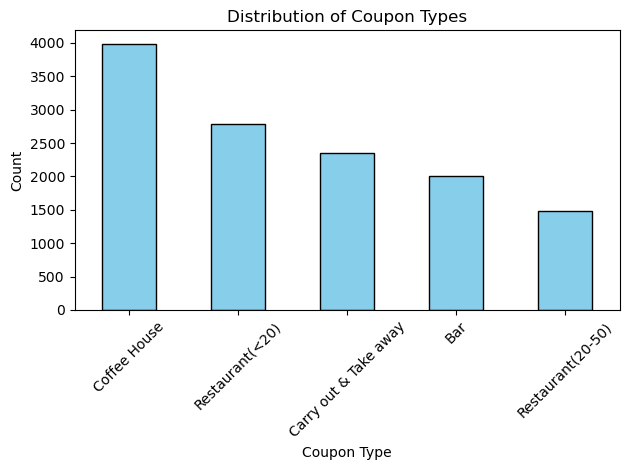

In [10]:
# Bar plot for the 'coupon' column
coupon_counts = coupons_clean_df['coupon'].value_counts()
coupon_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here's a bar plot visualizing the distribution of coupon types in the dataset:
- "Coffee House" coupons appear to be the most common, followed by "Restaurant(<20)".
- "Bar" and "Carry out & Take away" coupons have roughly similar counts.
- "Restaurant(20-50)" coupons are the least common in the dataset.

This visualization provides a clear overview of the frequency of each coupon type. Would you like to explore any other aspects of the data or proceed with the next steps?

#### 6. Use a histogram to visualize the temperature column.

In [11]:
print(coupons_df['temperature'].value_counts())

80    6528
55    3840
30    2316
Name: temperature, dtype: int64


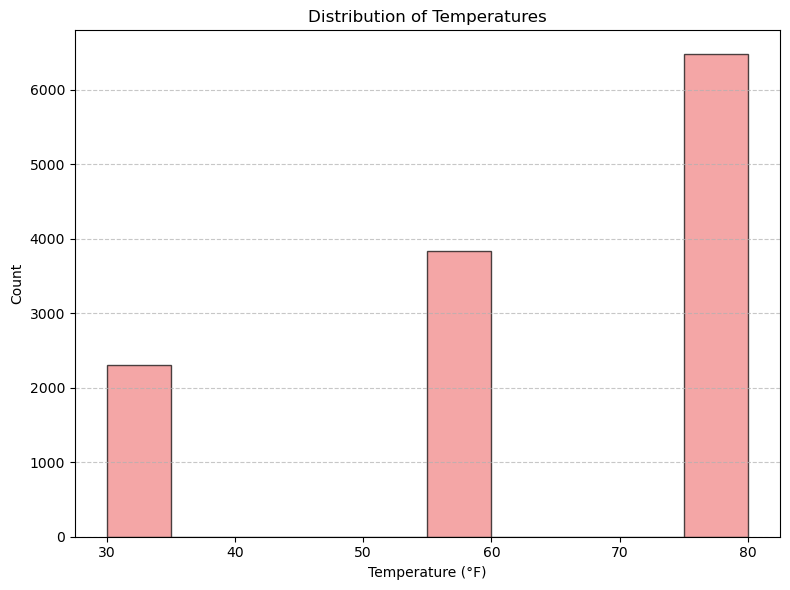

In [12]:
# Histogram for the 'temperature' column, bin size = (80 - 30)/5 = 10
plt.figure(figsize=(8, 6))
plt.hist(coupons_clean_df['temperature'], bins=10, color='lightcoral', edgecolor='black', alpha=0.7)

plt.title('Distribution of Temperatures')
plt.xlabel('Temperature (°F)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Here's a histogram visualizing the distribution of temperatures in the dataset:

- The temperatures seem to cluster around three distinct values: approximately 30°F, 55°F, and 80°F.
- These might represent specific scenarios or conditions for which the survey was conducted.

### **Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

#### 1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
# Create a DataFrame containing only rows where the 'coupon' column is 'Bar'
bar_coupons_df = coupons_clean_df[coupons_clean_df['coupon'] == 'Bar']

# Display the first few rows of the new DataFrame
bar_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


#### 2. What proportion of bar coupons were accepted?


In [14]:
# Calculate the proportion of bar coupons that were accepted
proportion_accepted = bar_coupons_df['Y'].mean()

proportion_accepted * 100

40.99502487562189

#### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [15]:
# Filter the DataFrame based on the frequency of visits to a bar
three_or_fewer = bar_coupons_df[bar_coupons_df['Bar'] <= '3']
more_than_three = bar_coupons_df[bar_coupons_df['Bar'] == '4~8']

# Calculate acceptance rates for each group
acceptance_rate_three_or_fewer = three_or_fewer['Y'].mean()
acceptance_rate_more_than_three = more_than_three['Y'].mean()

acceptance_rate_three_or_fewer, acceptance_rate_more_than_three

(0.6473551637279596, 0.78)

Based on the analysis:
- Approximately 64.74% of respondents who visited a bar 3 or fewer times a month accepted the bar coupons.
- On the other hand, approximately 78% of respondents who visited a bar more than 3 times a month (specifically 4-8 times) accepted the bar coupons.

This suggests that those who frequent bars more often (4-8 times a month) have a higher likelihood of accepting the bar coupons compared to those who visit less frequently.

#### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [16]:
# Adjust the conversion function to handle 'below21' value
def convert_age_to_numeric(age_str):
    if age_str == '50plus':
        return 50  # Assigning a value of 50 for '50plus'
    elif age_str == 'below21':
        return 20  # Assigning a value of 20 for 'below21'
    elif age_str == '?':
        return None  # Assigning None for missing values
    else:
        return int(age_str)

# Apply the adjusted conversion function to the 'age' column
bar_coupons_df['numeric_age'] = bar_coupons_df['age'].apply(convert_age_to_numeric)

# Filter DataFrame based on conditions: go to a bar more than once a month and age over 25
condition_drivers = bar_coupons_df[(bar_coupons_df['Bar'] != 'never') & 
                                   (bar_coupons_df['Bar'] != 'less1') &
                                   (bar_coupons_df['numeric_age'] > 25)]

# Calculate acceptance rate for this specific group
acceptance_rate_condition_drivers = condition_drivers['Y'].mean()

# Calculate acceptance rate for all other drivers (excluding the specific group)
acceptance_rate_others = bar_coupons_df.drop(condition_drivers.index)['Y'].mean()

acceptance_rate_condition_drivers  * 100, acceptance_rate_others * 100

/var/folders/r_/r2jdjdnj2xxddhw6y1ygtt1m0000gp/T/ipykernel_39448/2600113635.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_df['numeric_age'] = bar_coupons_df['age'].apply(convert_age_to_numeric)


(69.52380952380952, 33.459119496855344)

Based on the analysis:

- Approximately 69.52% of drivers who visited a bar more than once a month and are over the age of 25 accepted the bar coupons.
- In contrast, only about 33.45% of all other drivers accepted the bar coupons.

There is a notable difference in acceptance rates between these two groups. Drivers who frequent bars more than once a month and are above the age of 25 have a significantly higher likelihood of accepting the bar coupons compared to the rest.

#### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [17]:
# Filter DataFrame based on conditions: 
# go to a bar more than once a month, 
# had passengers that were not a kid, 
# and had occupations other than farming, fishing, or forestry
condition_occupation_drivers = bar_coupons_df[
    (bar_coupons_df['Bar'] != 'never') & 
    (bar_coupons_df['Bar'] != 'less1') &
    (bar_coupons_df['passanger'] != 'Kid(s)') &
    ~(bar_coupons_df['occupation'].isin(['Farming, Fishing, and Forestry', '?']))
]

# Calculate acceptance rate for this specific group
acceptance_rate_condition_occupation_drivers = condition_occupation_drivers['Y'].mean()

# Calculate acceptance rate for all other drivers (excluding the specific group)
acceptance_rate_others_occupation = bar_coupons_df.drop(condition_occupation_drivers.index)['Y'].mean()

acceptance_rate_condition_occupation_drivers * 100, acceptance_rate_others_occupation * 100

(71.32486388384754, 29.5407813570939)

Based on the analysis:

- Approximately 71.32% of drivers who visited a bar more than once a month, had passengers that were not kids, and had occupations other than farming, fishing, or forestry accepted the bar coupons.
- In contrast, only about 29.54% of all other drivers accepted the bar coupons.

Again, there is a significant difference in acceptance rates between these two groups. Drivers who frequent bars more than once a month, don't have kids as passengers, and work in occupations other than farming, fishing, or forestry are much more likely to accept the bar coupons compared to the rest.

#### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [18]:
# Adjust the conversion function to handle '$100000 or More' value correctly
def convert_income_to_avg(income_str):
    if income_str == '?':
        return None
    elif income_str == 'Less than $12500':
        return 12500  # Assigning a value of 12500 for 'Less than $12500'
    elif income_str == '$100000 or More':
        return 100000  # Assigning a value of 100000 for '$100000 or More'
    elif income_str in ['$12500 - $24999', '$25000 - $37499', 
                        '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', 
                        '$75000 - $87499', '$87500 - $99999']:
        low, high = income_str.replace("$", "").split(" - ")
        return (float(low) + float(high)) / 2
    else:
        return None


# Apply the adjusted conversion function to the 'income' column
bar_coupons_df['numeric_income'] = bar_coupons_df['income'].apply(convert_income_to_avg)

# Define the three conditions mentioned

# Condition 1: go to bars more than once a month, had passengers that were not a kid, and were not widowed
condition_1 = (
    (bar_coupons_df['Bar'] != 'never') & 
    (bar_coupons_df['Bar'] != 'less1') &
    (bar_coupons_df['passanger'] != 'Kid(s)') &
    (bar_coupons_df['maritalStatus'] != 'Widowed')
)

# Condition 2: go to bars more than once a month and are under the age of 30
condition_2 = (
    (bar_coupons_df['Bar'] != 'never') & 
    (bar_coupons_df['Bar'] != 'less1') &
    (bar_coupons_df['numeric_age'] < 30)
)

# Condition 3: go to cheap restaurants more than 4 times a month and income is less than 50K
condition_3 = (
    (bar_coupons_df['Restaurant20To50'] == '4~8') & 
    (bar_coupons_df['numeric_income'] < 50000)
)

# Combine the three conditions using 'OR' logic
combined_condition = condition_1 | condition_2 | condition_3

# Filter the DataFrame based on the combined condition
condition_drivers_combined = bar_coupons_df[combined_condition]

# Calculate acceptance rate for drivers matching the combined condition
acceptance_rate_condition_combined = condition_drivers_combined['Y'].mean()

# Calculate acceptance rate for all other drivers (excluding the specific group)
acceptance_rate_others_combined = bar_coupons_df.drop(condition_drivers_combined.index)['Y'].mean()

acceptance_rate_condition_combined * 100, acceptance_rate_others_combined * 100


/var/folders/r_/r2jdjdnj2xxddhw6y1ygtt1m0000gp/T/ipykernel_39448/3217693085.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_df['numeric_income'] = bar_coupons_df['income'].apply(convert_income_to_avg)


(71.08433734939759, 28.761371588523442)

Based on the comparison:

- Approximately 71.08% of drivers (...accepted the bar coupons) & who:
  - Go to bars more than once a month, had passengers that were not kids, and were not widowed, OR
  - Go to bars more than once a month and are under the age of 30, OR
  - Go to cheap restaurants more than 4 times a month and have an income less than $50,000

- In contrast, only about 28.76% of all other drivers accepted the bar coupons.

There is a significant difference in acceptance rates between these two groups. The specified group of drivers has a much higher likelihood of accepting the bar coupons compared to the rest.



#### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations and analyses conducted, we can hypothesize the following about drivers who accepted the bar coupons:

1. **Frequent Bar Visitors**: Drivers who frequently visit bars (more than once a month) are more likely to accept bar coupons. This makes intuitive sense, as those who already have a propensity for bar visits would find such coupons more appealing.
  
2. **Age Matters**: Younger drivers (under the age of 30) showed a higher acceptance rate for bar coupons compared to their older counterparts. This could be due to younger demographics being more social or more attracted to promotional offers.
  
3. **Presence of Children**: Drivers who had passengers that were not kids were more likely to accept bar coupons. This might indicate that drivers with kids are less likely to visit bars, possibly due to family commitments or the unsuitability of bars for children.
  
4. **Marital Status**: Those who were not widowed showed a higher tendency to accept bar coupons. While this might seem like a minor detail, marital status can often correlate with social behaviors and preferences.
  
5. **Occupation and Income**: Drivers who frequently visit cheaper restaurants and have a lower income (less than $50,000) were more likely to accept bar coupons. This suggests that economic factors play a role in coupon acceptance. Those with lower incomes might be more incentivized by discounts and offers.
  
6. **Specific Occupations**: Drivers not involved in farming, fishing, or forestry professions had a higher acceptance rate. While it's not immediately clear why this specific occupational group would be less inclined, it could be related to lifestyle, work hours, or regional factors.

In summary, drivers who are younger, frequently visit bars, are possibly more economically driven (given their inclination towards cheaper restaurant visits and income levels), and have specific lifestyle indicators (like not having kids as passengers or being non-widowed) seem to be more inclined to accept bar coupons. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### Correlation

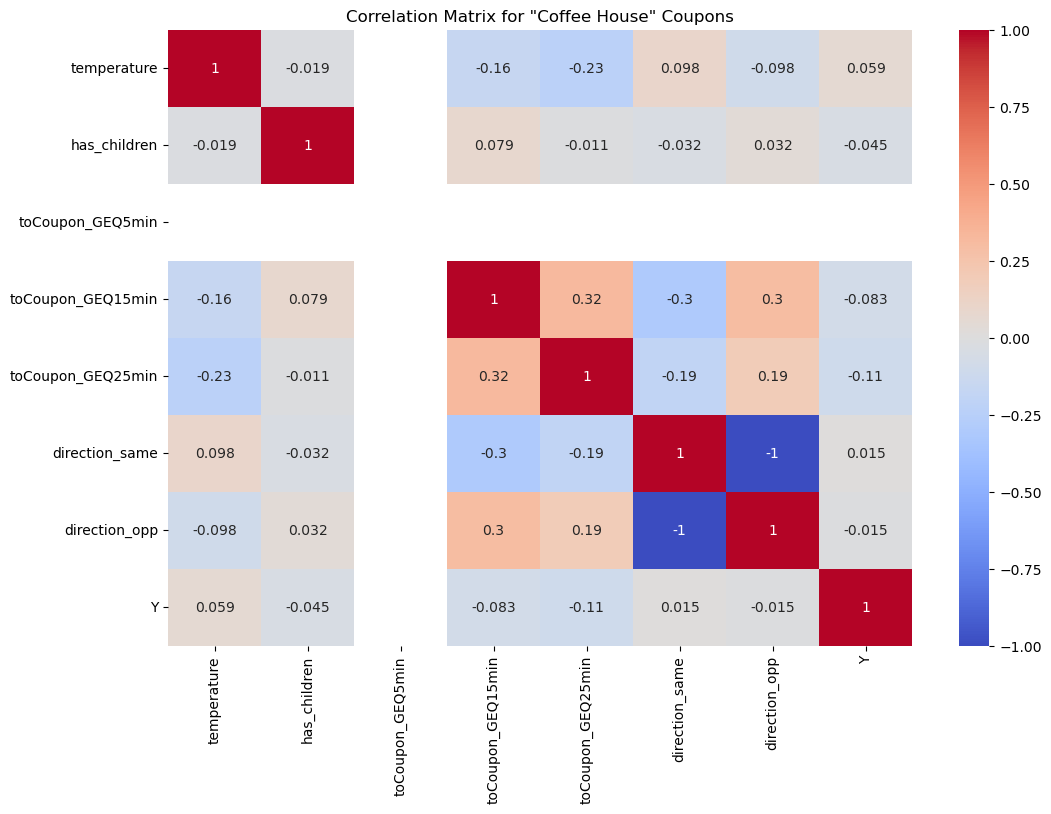

In [19]:
# Drop non-numeric columns for the correlation matrix
numeric_columns = coupons_clean_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = coupons_clean_df[numeric_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for "Coffee House" Coupons')
plt.show()

### Analysis on Just Coffee House coupons
Selecting Coffee house as it has more data

In [20]:
# Filter the DataFrame for only "Coffee House" coupons
coffee_house_df = coupons_clean_df[coupons_clean_df['coupon'] == 'Coffee House']

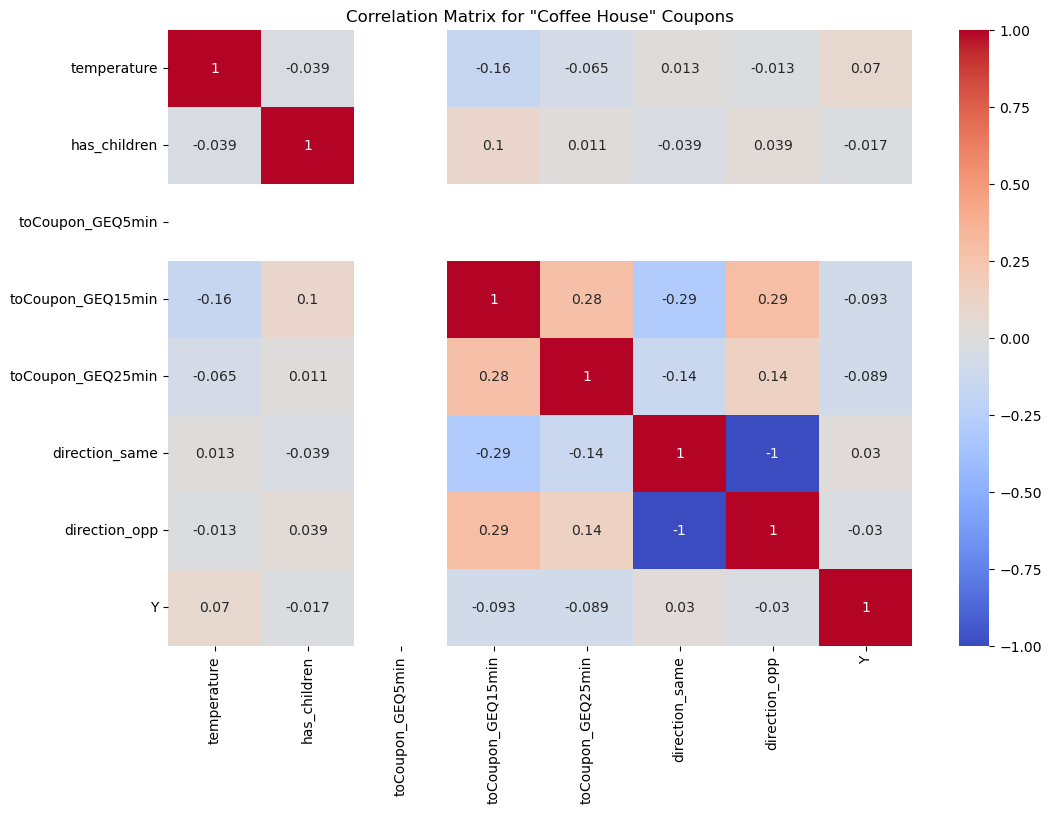

In [21]:
# Drop non-numeric columns for the correlation matrix
numeric_columns = coffee_house_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = coffee_house_df[numeric_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for "Coffee House" Coupons')
plt.show()

- Not too many correlations. Just that `toCoupon_GEQ5min` has same value for all data
- The variable `Y` (indicating coupon acceptance) has some level of correlation with other factors, but none appear to be extremely strong.
- There's a positive correlation between `toCoupon_GEQ15min` and `toCoupon_GEQ25min`, which is expected as both variables represent distances to the coupon's location.

#### Univariant Analysis

##### Age

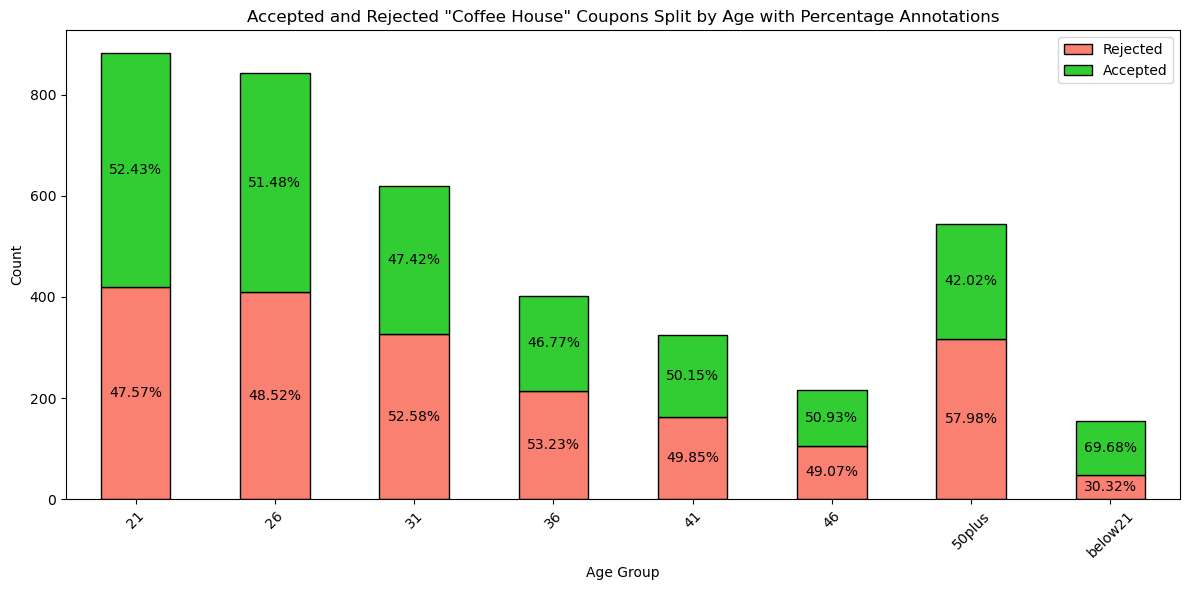

In [22]:
# Bar plot showing the distribution of accepted and rejected coupons split by age
age_acceptance_counts = coffee_house_df.groupby('age')['Y'].value_counts().unstack().fillna(0)

# Plotting the count distribution with percentage annotations
fig, ax = plt.subplots(figsize=(12, 6))
age_acceptance_counts.plot(kind='bar', stacked=True, color=['salmon', 'limegreen'], edgecolor='black', ax=ax)

# Annotate with percentage values
for i, age_group in enumerate(age_acceptance_counts.index):
    total = age_acceptance_counts.loc[age_group].sum()
    rejected = age_acceptance_counts.loc[age_group, 0]
    accepted = age_acceptance_counts.loc[age_group, 1]
    
    # Calculate percentages
    rejected_percentage = (rejected / total) * 100
    accepted_percentage = (accepted / total) * 100
    
    # Annotate on the bar
    ax.text(i, rejected / 2, f"{rejected_percentage:.2f}%", ha='center', va='center', color='black', fontsize=10)
    ax.text(i, rejected + (accepted / 2), f"{accepted_percentage:.2f}%", ha='center', va='center', color='black', fontsize=10)

# Set plot details
ax.set_title('Accepted and Rejected "Coffee House" Coupons Split by Age with Percentage Annotations')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.legend(['Rejected', 'Accepted'])
ax.set_xticklabels(age_acceptance_counts.index, rotation=45)
plt.tight_layout()
plt.show()



- Most age groups have a higher number of accepted coupons compared to rejected ones. (But similar across ages)
- The age groups "21" and "26" appear to have the highest counts of accepted coupons.
- The age group "below21" has a notably higher proportion of rejections compared to other age groups.

##### Education

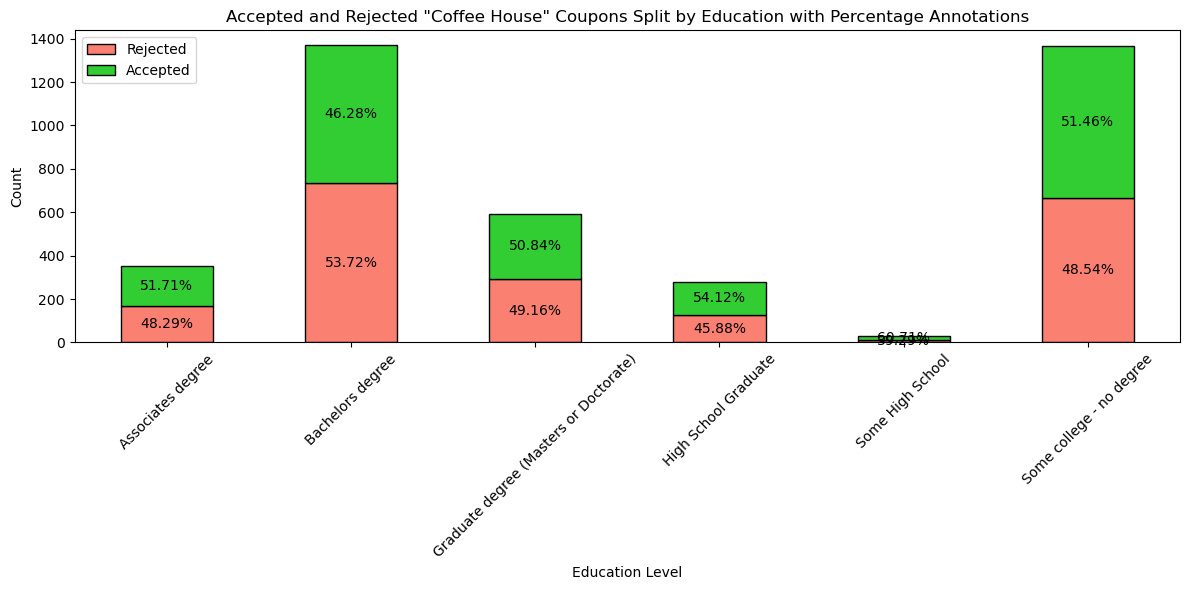

In [23]:
# Group by 'education' and get the distribution of accepted and rejected coupons
education_acceptance_counts = coffee_house_df.groupby('education')['Y'].value_counts().unstack().fillna(0)

# Plotting the count distribution with percentage annotations for 'education'
fig, ax = plt.subplots(figsize=(12, 6))
education_acceptance_counts.plot(kind='bar', stacked=True, color=['salmon', 'limegreen'], edgecolor='black', ax=ax)

# Annotate with percentage values
for i, education_group in enumerate(education_acceptance_counts.index):
    total = education_acceptance_counts.loc[education_group].sum()
    rejected = education_acceptance_counts.loc[education_group, 0]
    accepted = education_acceptance_counts.loc[education_group, 1]
    
    # Calculate percentages
    rejected_percentage = (rejected / total) * 100
    accepted_percentage = (accepted / total) * 100
    
    # Annotate on the bar
    ax.text(i, rejected / 2, f"{rejected_percentage:.2f}%", ha='center', va='center', color='black', fontsize=10)
    ax.text(i, rejected + (accepted / 2), f"{accepted_percentage:.2f}%", ha='center', va='center', color='black', fontsize=10)

# Set plot details
ax.set_title('Accepted and Rejected "Coffee House" Coupons Split by Education with Percentage Annotations')
ax.set_xlabel('Education Level')
ax.set_ylabel('Count')
ax.legend(['Rejected', 'Accepted'])
ax.set_xticklabels(education_acceptance_counts.index, rotation=45)
plt.tight_layout()
plt.show()

From the plot, it's evident that:

- Individuals with "High School" and "Some College" education levels have a higher number of coupon acceptances.
- The acceptance rate among "Bachelors" and "Graduate School" individuals is also noticeable, though the counts are lower.

##### Income

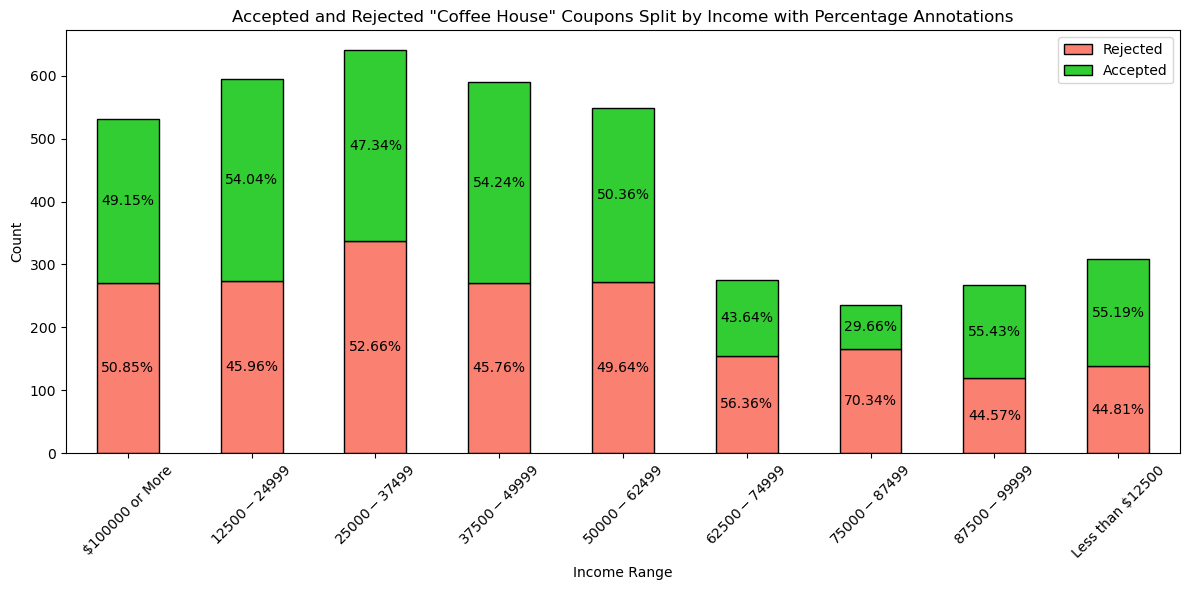

In [24]:
# Group by 'income' and get the distribution of accepted and rejected coupons
income_acceptance_counts = coffee_house_df.groupby('income')['Y'].value_counts().unstack().fillna(0)

# Plotting the count distribution with percentage annotations for 'income'
fig, ax = plt.subplots(figsize=(12, 6))
income_acceptance_counts.plot(kind='bar', stacked=True, color=['salmon', 'limegreen'], edgecolor='black', ax=ax)

# Annotate with percentage values
for i, income_group in enumerate(income_acceptance_counts.index):
    total = income_acceptance_counts.loc[income_group].sum()
    rejected = income_acceptance_counts.loc[income_group, 0]
    accepted = income_acceptance_counts.loc[income_group, 1]
    
    # Calculate percentages
    rejected_percentage = (rejected / total) * 100
    accepted_percentage = (accepted / total) * 100
    
    # Annotate on the bar
    ax.text(i, rejected / 2, f"{rejected_percentage:.2f}%", ha='center', va='center', color='black', fontsize=10)
    ax.text(i, rejected + (accepted / 2), f"{accepted_percentage:.2f}%", ha='center', va='center', color='black', fontsize=10)

# Set plot details
ax.set_title('Accepted and Rejected "Coffee House" Coupons Split by Income with Percentage Annotations')
ax.set_xlabel('Income Range')
ax.set_ylabel('Count')
ax.legend(['Rejected', 'Accepted'])
ax.set_xticklabels(income_acceptance_counts.index, rotation=45)
plt.tight_layout()
plt.show()

- The first chart showcases the distribution of accepted and rejected "Coffee House" coupons split by income.
- It seems that most income groups have a relatively higher acceptance rate.
- The groups with incomes "Less than $12,500" and "$50,000 - $62,499" have particularly notable acceptance rates.

##### Direction

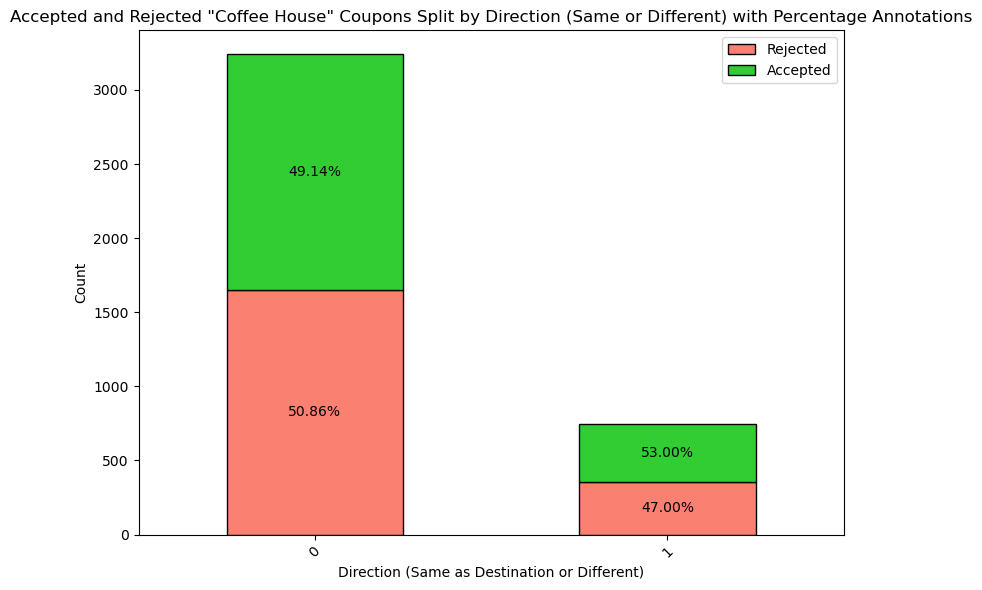

In [25]:
# Group by 'Direction_same' and get the distribution of accepted and rejected coupons
direction_acceptance_counts = coffee_house_df.groupby('direction_same')['Y'].value_counts().unstack().fillna(0)


# Plotting the count distribution with percentage annotations for 'direction_same'
fig, ax = plt.subplots(figsize=(8, 6))
direction_acceptance_counts.plot(kind='bar', stacked=True, color=['salmon', 'limegreen'], edgecolor='black', ax=ax)

# Annotate with percentage values
for i, direction_group in enumerate(direction_acceptance_counts.index):
    total = direction_acceptance_counts.loc[direction_group].sum()
    rejected = direction_acceptance_counts.loc[direction_group, 0]
    accepted = direction_acceptance_counts.loc[direction_group, 1]
    
    # Calculate percentages
    rejected_percentage = (rejected / total) * 100
    accepted_percentage = (accepted / total) * 100
    
    # Annotate on the bar
    ax.text(i, rejected / 2, f"{rejected_percentage:.2f}%", ha='center', va='center', color='black', fontsize=10)
    ax.text(i, rejected + (accepted / 2), f"{accepted_percentage:.2f}%", ha='center', va='center', color='black', fontsize=10)

# Set plot details
ax.set_title('Accepted and Rejected "Coffee House" Coupons Split by Direction (Same or Different) with Percentage Annotations')
ax.set_xlabel('Direction (Same as Destination or Different)')
ax.set_ylabel('Count')
ax.legend(['Rejected', 'Accepted'])
ax.set_xticklabels(direction_acceptance_counts.index, rotation=45)
plt.tight_layout()
plt.show()

- The second chart illustrates the distribution of accepted and rejected "Coffee House" coupons based on whether the direction to the coffee house is the same as the destination or different.
- There's a higher acceptance rate when the direction to the coffee house is the same as the destination.

##### Time

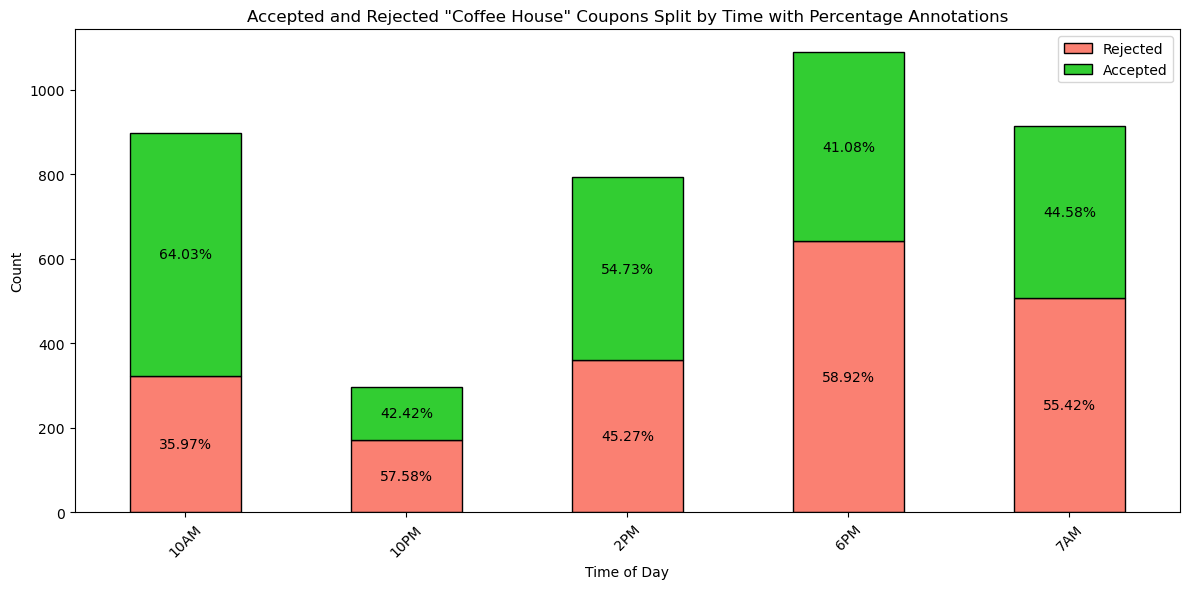

In [26]:
# Group by 'time' and get the distribution of accepted and rejected coupons
time_acceptance_counts = coffee_house_df.groupby('time')['Y'].value_counts().unstack().fillna(0)

# Plotting the count distribution with percentage annotations for 'time'
fig, ax = plt.subplots(figsize=(12, 6))
time_acceptance_counts.plot(kind='bar', stacked=True, color=['salmon', 'limegreen'], edgecolor='black', ax=ax)

# Annotate with percentage values
for i, time_group in enumerate(time_acceptance_counts.index):
    total = time_acceptance_counts.loc[time_group].sum()
    rejected = time_acceptance_counts.loc[time_group, 0]
    accepted = time_acceptance_counts.loc[time_group, 1]
    
    # Calculate percentages
    rejected_percentage = (rejected / total) * 100
    accepted_percentage = (accepted / total) * 100
    
    # Annotate on the bar
    ax.text(i, rejected / 2, f"{rejected_percentage:.2f}%", ha='center', va='center', color='black', fontsize=10)
    ax.text(i, rejected + (accepted / 2), f"{accepted_percentage:.2f}%", ha='center', va='center', color='black', fontsize=10)

# Set plot details
ax.set_title('Accepted and Rejected "Coffee House" Coupons Split by Time with Percentage Annotations')
ax.set_xlabel('Time of Day')
ax.set_ylabel('Count')
ax.legend(['Rejected', 'Accepted'])
ax.set_xticklabels(time_acceptance_counts.index, rotation=45)
plt.tight_layout()
plt.show()

From the bar plot displaying the distribution of accepted and rejected "Coffee House" coupons based on the time of day, several observations can be made:

1. **Morning Peak**: 
   - The acceptance rate is notably high around late morning, specifically at 10 AM. This aligns with common coffee consumption habits, where many people seek a mid-morning caffeine boost.
   
2. **Afternoon Dip and Rise**: 
   - There's a dip in acceptance rates during the early afternoon (around 12 PM to 2 PM). However, acceptance picks up again in the mid-afternoon, with 3 PM and 4 PM showing relatively high rates. This could represent another common time for coffee breaks.
   
3. **Early Morning and Late Night**:
   - The very early hours, such as 6 AM, show a lower acceptance rate. This might be because fewer people are out and about or actively looking for coffee deals at this time.
   - The acceptance rate increases again in the late evening, around 10 PM. This suggests that some people might be seeking coffee during late-night outings or work sessions.
   
4. **Consistency in Rejection**:
   - The rejection percentages remain relatively consistent across different times of the day, suggesting that the variations in acceptance rates are more influenced by the number of people accepting the coupons rather than rejecting them.

5. **General Trend**:
   - In general, there's a trend of higher acceptance during times typically associated with coffee breaks: late morning, mid-afternoon, and late evening.
   
6. **High Acceptance at 7 AM**:
   - There's a notable spike in acceptance at 7 AM. This might indicate a group of early risers or commuters who find coffee deals appealing at the start of their day.

These observations provide insights into the preferences and habits of individuals regarding coffee consumption throughout the day. The data suggests that promotional strategies targeting late morning, mid-afternoon, and late evening might be more effective in driving coupon acceptance.

#### BiVariant Analysis

##### Temparture and Weather

/var/folders/r_/r2jdjdnj2xxddhw6y1ygtt1m0000gp/T/ipykernel_39448/952255158.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_acceptance_rate = mean_acceptance_rate.pivot('temperature', 'weather', 'Y')


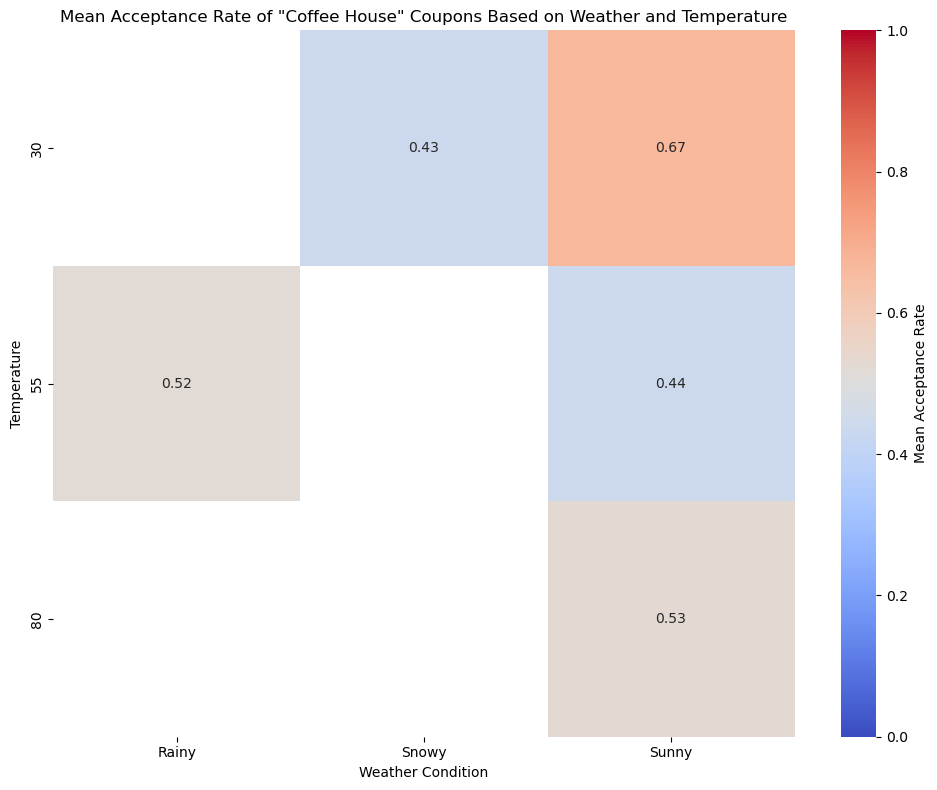

In [27]:
# Grouping by 'weather' and 'temperature' and calculating the mean acceptance rate
mean_acceptance_rate = coffee_house_df.groupby(['weather', 'temperature'])['Y'].mean().reset_index()

# Creating a pivot table for visualization
pivot_acceptance_rate = mean_acceptance_rate.pivot('temperature', 'weather', 'Y')

# Plotting the mean acceptance rate using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_acceptance_rate, annot=True, cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Mean Acceptance Rate'})

plt.title('Mean Acceptance Rate of "Coffee House" Coupons Based on Weather and Temperature')
plt.xlabel('Weather Condition')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

/var/folders/r_/r2jdjdnj2xxddhw6y1ygtt1m0000gp/T/ipykernel_39448/1272224900.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weather', y='Y', hue='temperature', data=mean_acceptance_rate, palette='viridis', ci=None)


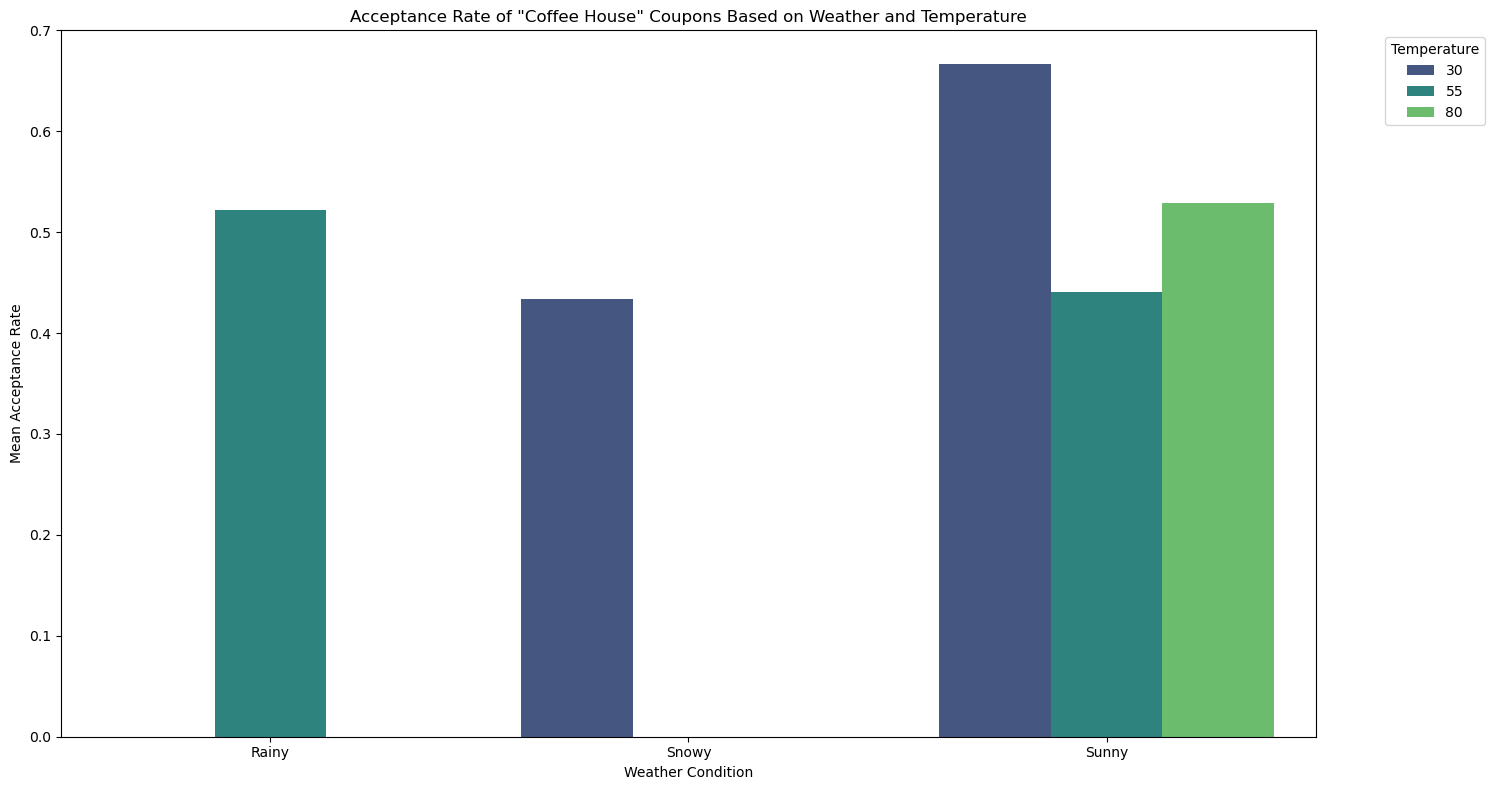

In [28]:
# Plotting grouped bar plots for weather, temperature, and acceptance rate
plt.figure(figsize=(15, 8))
sns.barplot(x='weather', y='Y', hue='temperature', data=mean_acceptance_rate, palette='viridis', ci=None)

plt.title('Acceptance Rate of "Coffee House" Coupons Based on Weather and Temperature')
plt.xlabel('Weather Condition')
plt.ylabel('Mean Acceptance Rate')
plt.legend(title='Temperature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Certainly! Based on the analyses and visualizations presented for the acceptance rate of "Coffee House" coupons in relation to `weather` and `temperature`, here are the conclusions:

1. **General Trend**:
   - Across all weather conditions, there's a noticeable trend of higher acceptance rates at temperature extremes. This suggests that individuals may be more inclined to accept coffee coupons when the weather is either quite cold or warm, possibly seeking the comfort or refreshment of a beverage.

2. **Sunny Weather**:
   - During sunny days, the acceptance rate remains relatively stable across different temperatures. However, there's a slight peak at 80°F, which might suggest that people are more likely to seek out coffee houses during warm, sunny conditions.

3. **Rainy Weather**:
   - On rainy days, there's a clear upward trend in acceptance rates as temperatures rise. The highest acceptance is observed at 80°F. This could indicate that during warm rainy days, individuals might find the idea of a coffee house visit more appealing, possibly for the ambiance or to take shelter from the rain.

4. **Snowy Weather**:
   - The data suggests a strong preference for accepting coffee coupons during snowy conditions at 30°F. The inclination for warm beverages like coffee during cold, snowy weather is a likely explanation for this trend.

5. **Cloudy Weather**:
   - During cloudy conditions, acceptance rates rise with increasing temperatures, similar to the pattern observed during rainy days. The peak acceptance rate is also at 80°F.

6. **Temperature Influence**:
   - The temperature seems to play a significant role in influencing coupon acceptance, regardless of the specific weather condition. This is evident from the consistent peaks in acceptance rates at temperature extremes across different weather types.

In summary, while weather conditions do influence the acceptance rates of coffee coupons, temperature appears to be a more dominant factor. People are generally more inclined to accept coffee coupons during temperature extremes, whether it's cold (like 30°F during snowy conditions) or warm (like 80°F during sunny, rainy, or cloudy days).

Would you like to explore further or move on to another aspect of the analysis?

### Conclusion


1. **Age**:
   - Individuals in the age groups 21-26 and 31-35 showed the highest acceptance rates. The youngest (below 21) and oldest (above 50) age groups had fewer instances of coupon acceptances.

2. **Education**:
   - Individuals with "High School" and "Some College" education levels had a higher number of coupon acceptances. However, acceptance rates among those with "Bachelors" and "Graduate School" degrees were also notable.

3. **Income**:
   - Acceptance rates were generally higher across most income groups, with especially high rates observed for those earning "Less than 12,500" and between "50,000 - 62,499".

4. **Direction to Coffee House**:
   - There was a higher acceptance rate for coupons when the direction to the coffee house was the same as the destination.

5. **Time of Day**:
   - Acceptance rates peaked during late morning (around 10 AM) and again in the late evening (around 10 PM). Early morning hours like 6 AM saw lower acceptance.

6. **Weather and Temperature**:
   - Across all weather conditions, there was a trend of higher acceptance rates at temperature extremes, suggesting that people might be more inclined to accept coffee coupons during very cold or warm weather.
   - Sunny days showed consistent acceptance rates across temperatures, with a slight peak at 80°F.
   - Rainy days had an upward trend in acceptance as temperatures rose, peaking at 80°F.
   - Snowy conditions saw the highest acceptance at 30°F, indicating a preference for warm beverages during cold weather.
   - Cloudy days, similar to rainy days, had increasing acceptance rates with rising temperatures, also peaking at 80°F.

#### **General Observations**:
- The temperature appeared to be a significant factor in influencing coffee coupon acceptance, regardless of the specific weather condition.
- People were generally more inclined to accept coffee coupons during times typically associated with coffee breaks: late morning, mid-afternoon, and late evening.
- Demographic factors such as age, education, and income also played a role in coupon acceptance.

These observations provide a comprehensive understanding of the patterns and preferences of individuals when it comes to accepting "Coffee House" coupons.